In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class DummyModel2(nn.Module):
    def __init__(self, input_dim=6, 
                 output_dim=3, 
                 hidden_dim_1=16,
                 hidden_dim_2=16,
                 dropout_rate=0) -> None:
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.fc3 = nn.Linear(hidden_dim_2, output_dim)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.act(x)
        x = self.fc3(x)
        return x


class DummyModel3(nn.Module):
    def __init__(self, input_dim=6, 
                 output_dim=3, 
                 hidden_dim_1=16,
                 hidden_dim_2=16,
                 hidden_dim_3=16, 
                 dropout_rate=0) -> None:
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.fc3 = nn.Linear(hidden_dim_2, hidden_dim_3)
        self.fc4 = nn.Linear(hidden_dim_3, output_dim)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.act(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.act(x)
        x = self.fc4(x)
        return x

In [22]:
hidden_dim_1 = 64
hidden_dim_2 = 64
hidden_dim_3 = 64

save_path = f"MLP_3_{hidden_dim_1}_{hidden_dim_2}_{hidden_dim_3}_6_best.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"

model = DummyModel3(hidden_dim_1=hidden_dim_1, 
                   hidden_dim_2=hidden_dim_2, 
                   hidden_dim_3=hidden_dim_3, 
                   )

model.load_state_dict(torch.load(save_path))
model.to(device)

DummyModel3(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
  (act): ReLU()
  (dropout): Dropout(p=0, inplace=False)
)

In [23]:
# hidden_dim_1 = 64
# hidden_dim_2 = 64
# dropout_rate = 0.
# save_path = f"MLP_3_{hidden_dim_1}_{hidden_dim_2}_6_best.pth"

# device = "cuda" if torch.cuda.is_available() else "cpu"
# # model = DummyModel(hidden_dim=256)
# model = DummyModel2(hidden_dim_1=hidden_dim_1, 
#                    hidden_dim_2=hidden_dim_2, 
#                    dropout_rate=dropout_rate)

# model.load_state_dict(torch.load(save_path))

In [24]:
from data_utils import split_tracks
train_tracks, test_tracks = split_tracks()

In [25]:
import matplotlib.pyplot as plt

def inference_track(track):
    X = track[:, 0:6]
    y = track[:, 6:]
    X = torch.Tensor(X)
    y = torch.Tensor(y)
    with torch.inference_mode():
        output = model(X).cpu().detach().numpy()

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.plot(y[:, 0], "b", label="SDRE")
    plt.plot(output[:, 0], "r--", label="NN approx")
    plt.title("U1")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(y[:, 1], "b", label="SDRE")
    plt.plot(output[:, 1], "r--", label="NN approx")
    plt.title("U2")
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(y[:, 1], "b", label="SDRE")
    plt.plot(output[:, 1], "r--", label="NN approx")
    plt.title("U3")
    plt.legend()
    

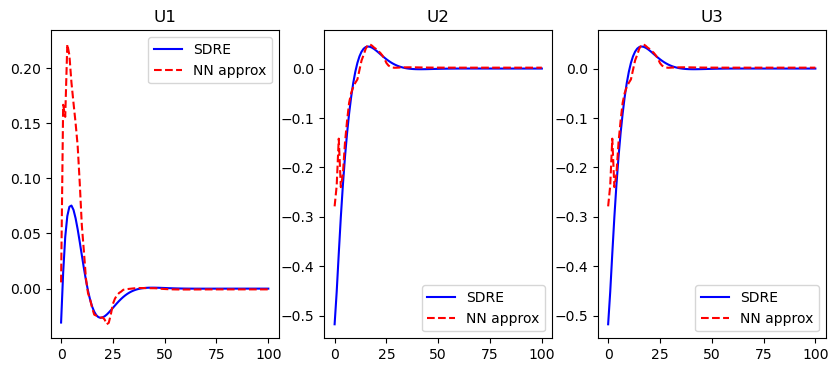

In [46]:
inference_track(test_tracks[18])

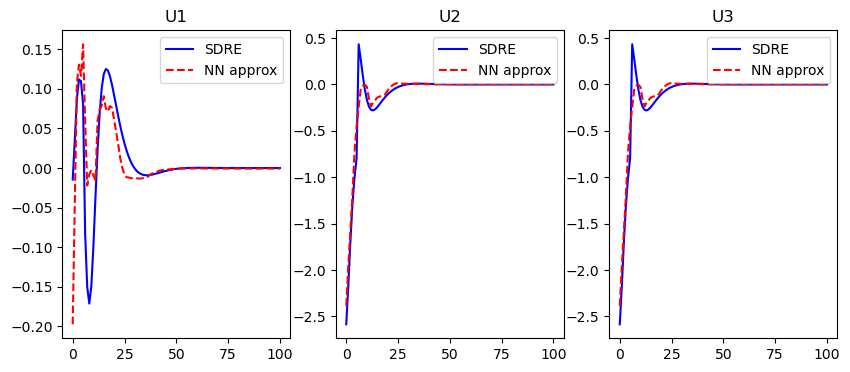

In [27]:
inference_track(train_tracks[4])